In [3]:
import pandas as pd
import numpy as np

2. Concatenating

In [4]:
df1 = pd.DataFrame(np.full((2, 3), "x", dtype=object), columns=["A", "B", "C"])
df1

,A,B,C
0,x,x,x
1,x,x,x


In [5]:
df2 = pd.DataFrame(np.full((3, 3), "o", dtype=object), columns=["A", "B", "C"])
df2

,A,B,C
0,o,o,o
1,o,o,o
2,o,o,o


In [6]:
df3 = pd.DataFrame(np.full((2, 2), "v", dtype=object), columns=["D", "E"])
df3

,D,E
0,v,v
1,v,v


Concatenation along axis 0

In [7]:
pd.concat([df1, df2])

,A,B,C
0,x,x,x
1,x,x,x
0,o,o,o
1,o,o,o
2,o,o,o


In [8]:
pd.concat([df1, df2]).reset_index(drop=True)

,A,B,C
0,x,x,x
1,x,x,x
2,o,o,o
3,o,o,o
4,o,o,o


In [9]:
pd.concat([df1, df3])

,A,B,C,D,E
0,x,x,x,NaN,NaN
1,x,x,x,NaN,NaN
0,NaN,NaN,NaN,v,v
1,NaN,NaN,NaN,v,v


The `keys` parameter

In [10]:
df4 = pd.concat([df1, df2], keys=["df1", "df2"])
df4

A  B  C
df1 0  x  x  x
    1  x  x  x
df2 0  o  o  o
    1  o  o  o
    2  o  o  o

Concatenating along axis 1

In [11]:
pd.concat([df1, df3], axis=1)

,A,B,C,D,E
0,x,x,x,v,v
1,x,x,x,v,v


In [12]:
pd.concat([df1, df2], axis=1)

,A,B,C,A,B,C
0,x,x,x,o,o,o
1,x,x,x,o,o,o
2,NaN,NaN,NaN,o,o,o


The `join` parameter

In [13]:
pd.concat([df1, df2], axis=1, join="inner")

,A,B,C,A,B,C
0,x,x,x,o,o,o
1,x,x,x,o,o,o


In [14]:
pd.concat([df1, df3],join="inner")

""
0
1
0
1


3. Merging and joining

In [15]:
users = pd.DataFrame(
    {
        "userID": [5672, 3452, 2878, 3234],
        "First Name": ["Christopher", "Johnnie", "Debbie", "Teri"],
        "Last Name": ["Boyd", "Baldwin", "Alvarez", "Gill"],
    }
)
users

,userID,First Name,Last Name
0,5672,Christopher,Boyd
1,3452,Johnnie,Baldwin
2,2878,Debbie,Alvarez
3,3234,Teri,Gill


In [16]:
scores = pd.DataFrame(
    {"userID": [2878, 5672, 3234, 5672, 2878], "Score": [84, 56, 72, 77, 88]}
)
scores

,userID,Score
0,2878,84
1,5672,56
2,3234,72
3,5672,77
4,2878,88


In [17]:
"""Pandas finds by itself the column which is in common between the two DataFrames, which is the userID column. 
It has then merged the two DataFrames according to this column.
"""
merged_df = pd.merge(users, scores)
merged_df

,userID,First Name,Last Name,Score
0,5672,Christopher,Boyd,56
1,5672,Christopher,Boyd,77
2,2878,Debbie,Alvarez,84
3,2878,Debbie,Alvarez,88
4,3234,Teri,Gill,72


In [18]:
scores2 = pd.DataFrame(
    {"studentID": [2878, 5672, 3234, 5672, 2878], "Score": [84, 56, 72, 77, 88]}
)
scores2

,studentID,Score
0,2878,84
1,5672,56
2,3234,72
3,5672,77
4,2878,88


In [19]:
# MergeError: No common columns to perform merge on
pd.merge(users, scores2)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:2                                                                                    │
│                                                                                                  │
│   1 # MergeError: No common columns to perform merge on                                          │
│ ❱ 2 pd.merge(users, scores2)                                                                     │
│   3                                                                                              │
│                                                                                                  │
│ /home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/pandas/c │
│ ore/reshape/merge.py:144 in merge                                                                │
│                                                                                                  │
│    141 │   indicator: str | bool = False,                                                        │
│    142 │   validate: str | None = None,                                                          │
│    143 ) -> DataFrame:                                                                           │
│ ❱  144 │   op = _MergeOperation(                                                                 │
│    145 │   │   left,                                                                             │
│    146 │   │   right,                                                                            │
│    147 │   │   how=how,                                                                          │
│                                                                                                  │
│ /home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/pandas/c │
│ ore/reshape/merge.py:715 in __init__                                                             │
│                                                                                                  │
│    712 │   │   │   )                                                                             │
│    713 │   │   │   raise MergeError(msg)                                                         │
│    714 │   │                                                                                     │
│ ❱  715 │   │   self.left_on, self.right_on = self._validate_left_right_on(left_on, right_on)     │
│    716 │   │                                                                                     │
│    717 │   │   cross_col = None                                                                  │
│    718 │   │   if self.how == "cross":                                                           │
│                                                                                                  │
│ /home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/pandas/c │
│ ore/reshape/merge.py:1482 in _validate_left_right_on                                             │
│                                                                                                  │
│   1479 │   │   │   │   right_cols = self.right.columns                                           │
│   1480 │   │   │   │   common_cols = left_cols.intersection(right_cols)                          │
│   1481 │   │   │   │   if len(common_cols) == 0:                                                 │
│ ❱ 1482 │   │   │   │   │   raise MergeError(                                                     │
│   1483 │   │   │   │   │   │   "No common columns to perform merge on. "                         │
│   1484 │   │   │   │   │   │   f"Merge options: left_on={left_on}, "                             │
│   1485 │   │   │   │   │   │   f"right_on={right_on}, "                                          │
╰────────────────────────────────────────────────────────────

In [20]:
pd.merge(users, scores2, left_on="userID", right_on="studentID")

,userID,First Name,Last Name,studentID,Score
0,5672,Christopher,Boyd,5672,56
1,5672,Christopher,Boyd,5672,77
2,2878,Debbie,Alvarez,2878,84
3,2878,Debbie,Alvarez,2878,88
4,3234,Teri,Gill,3234,72


Merging on multiple columns

In [21]:
gold = pd.DataFrame(
    {
        "Code": ["CAN", "GER", "USA", "NOR"],
        "Country": ["Canada", "Germany", "United States", "Norway"],
        "Total": [14, 10, 9, 9],
    }
)
gold

,Code,Country,Total
0,CAN,Canada,14
1,GER,Germany,10
2,USA,United States,9
3,NOR,Norway,9


In [22]:
bronze = pd.DataFrame(
    {
        "Code": ["USA", "GER", "NOR", "AUS"],
        "Country": ["United States", "Germany", "Norway", "Austria"],
        "Total": [13, 7, 7, 6],
    }
)
bronze

,Code,Country,Total
0,USA,United States,13
1,GER,Germany,7
2,NOR,Norway,7
3,AUS,Austria,6


In [23]:
""" This is because, by default, pandas tries to merge according to all common columns. 
This means that the rows of the merged DataFrame consist of all rows
where the Code, Country, and Total columns are identical in both DataFrames. """

pd.merge(gold, bronze)

,Code,Country,Total


In [24]:
pd.merge(gold, bronze, on=["Code", "Country"])

,Code,Country,Total_x,Total_y
0,GER,Germany,10,7
1,USA,United States,9,13
2,NOR,Norway,9,7


In [25]:
pd.merge(gold, bronze, on=["Code", "Country"], suffixes=["_gold", "_bronze"])

,Code,Country,Total_gold,Total_bronze
0,GER,Germany,10,7
1,USA,United States,9,13
2,NOR,Norway,9,7


Different types of joins

In [26]:
"""This type of join returns both the merge of the matched rows and the unmatched values 
from both the left and right DataFrames."""
pd.merge(
    gold, bronze, on=["Code", "Country"], suffixes=["_gold", "_bronze"], how="outer"
)

,Code,Country,Total_gold,Total_bronze
0,CAN,Canada,14.0,NaN
1,GER,Germany,10.0,7.0
2,USA,United States,9.0,13.0
3,NOR,Norway,9.0,7.0
4,AUS,Austria,NaN,6.0


`left` join: return the merge of the matched rows and the unmatched values from only the left DataFrame  
`right` join: return the merge of the matched rows and the unmatched values from only the right DataFrame


In [27]:
pd.merge(
    gold, bronze, on=["Code", "Country"], suffixes=["_gold", "_bronze"], how="left"
)

,Code,Country,Total_gold,Total_bronze
0,CAN,Canada,14,NaN
1,GER,Germany,10,7.0
2,USA,United States,9,13.0
3,NOR,Norway,9,7.0


In [28]:
pd.merge(
    gold, bronze, on=["Code", "Country"], suffixes=["_gold", "_bronze"], how="right"
)

,Code,Country,Total_gold,Total_bronze
0,USA,United States,9.0,13
1,GER,Germany,10.0,7
2,NOR,Norway,9.0,7
3,AUS,Austria,NaN,6


**Remark**: We would like to draw your attention to one particular issue that can arise when performing an outer merge. Suppose we have two DataFrames containing integer values

In [29]:
df1 = pd.DataFrame({"key": [1, 2, 3, 4], "val1": [1, 2, 3, 4]})
df2 = pd.DataFrame({"key": [1, 2, 3, 5], "val2": [1, 2, 3, 4]})

In [30]:
df_in = df1.merge(df2, how="inner")
df_in

,key,val1,val2
0,1,1,1
1,2,2,2
2,3,3,3


In [31]:
df_out = df1.merge(df2, how="outer")
df_out

,key,val1,val2
0,1,1.0,1.0
1,2,2.0,2.0
2,3,3.0,3.0
3,4,4.0,NaN
4,5,NaN,4.0


`dtype` of columns with `NaN` values was changed to `float`

4. Exercise: merging with different joins

In [32]:
left = pd.DataFrame(
    {"key1": ["a", "b", "c"], "key2": ["A", "B", "C"], "lval": [0, 1, 2]}
)
right = pd.DataFrame(
    {"key1": ["a", "b", "c"], "key2": ["A", "D", "C"], "rval": [3, 4, 6]}
)

In [33]:
left

,key1,key2,lval
0,a,A,0
1,b,B,1
2,c,C,2


In [34]:
right

,key1,key2,rval
0,a,A,3
1,b,D,4
2,c,C,6


Question A.

In [35]:
left.merge(right, how='inner')

,key1,key2,lval,rval
0,a,A,0,3
1,c,C,2,6


Question B.

In [36]:
left.merge(right, how='outer')

,key1,key2,lval,rval
0,a,A,0.0,3.0
1,b,B,1.0,NaN
2,c,C,2.0,6.0
3,b,D,NaN,4.0


Question C.

In [37]:
pd.merge(left, right, how='right')

,key1,key2,lval,rval
0,a,A,0.0,3
1,b,D,NaN,4
2,c,C,2.0,6


Question D.

In [38]:
pd.merge(left, right, on=['key1'], how='outer', suffixes=['_x','_y'])

,key1,key2_x,lval,key2_y,rval
0,a,A,0,A,3
1,b,B,1,D,4
2,c,C,2,C,6


5. Pivoting

The pivot() function is applied to a DataFrame and has three important parameters: index, columns, and values:
- it takes the entries from the column passed to index and makes these the indices of the new DataFrame
- it takes the entries from the column passed to columns and makes these the column labels of the new DataFrame
- it takes the entries from the column passed to values and uses them to fill in the new DataFrame, by putting them in the corresponding columns


In [39]:
values = [3, 81, 1, 56, 71, 91, 54, 94, 64, 90, 21, 36]
coordinates = ["x", "y", "z"] * 4
time = [0] * 3 + [1] * 3 + [2] * 3 + [3] * 3
df = pd.DataFrame({"time": time, "coordinates": coordinates, "values": values})
df

,time,coordinates,values
0,0,x,3
1,0,y,81
2,0,z,1
3,1,x,56
4,1,y,71
5,1,z,91
6,2,x,54
7,2,y,94
8,2,z,64
9,3,x,90


In [40]:
df_pivot = df.pivot(index="time", columns="coordinates", values="values")
df_pivot

coordinates,x,y,z
time,,,
0,3,81,1
1,56,71,91
2,54,94,64
3,90,21,36


The `pivot_table()` funtion

In [41]:
values2 = [6, 82, 9, 47, 8, 12, 64, 88, 53, 46, 59, 60]

In [42]:
df2 = pd.DataFrame(
    {"time": time * 2, "coordinates": coordinates * 2, "values": values + values2}
)
df2

,time,coordinates,values
0,0,x,3
1,0,y,81
2,0,z,1
3,1,x,56
4,1,y,71
5,1,z,91
6,2,x,54
7,2,y,94
8,2,z,64
9,3,x,90


In [43]:
df2.pivot(index='time', columns='coordinates', values='values')
# ValueError: Index contains duplicate entries, cannot reshape

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 df2.pivot(index='time', columns='coordinates', values='values')                              │
│   2 # ValueError: Index contains duplicate entries, cannot reshape                               │
│   3                                                                                              │
│                                                                                                  │
│ /home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/pandas/c │
│ ore/frame.py:8424 in pivot                                                                       │
│                                                                                                  │
│    8421 │   def pivot(self, *, columns, index=lib.NoDefault, values=lib.NoDefault) -> DataFrame: │
│    8422 │   │   from pandas.core.reshape.pivot import pivot                                      │
│    8423 │   │                                                                                    │
│ ❱  8424 │   │   return pivot(self, index=index, columns=columns, values=values)                  │
│    8425 │                                                                                        │
│    8426 │   _shared_docs[                                                                        │
│    8427 │   │   "pivot_table"                                                                    │
│                                                                                                  │
│ /home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/pandas/c │
│ ore/reshape/pivot.py:557 in pivot                                                                │
│                                                                                                  │
│   554 │   # error: Argument 1 to "unstack" of "DataFrame" has incompatible type "Union           │
│   555 │   # [List[Any], ExtensionArray, ndarray[Any, Any], Index, Series]"; expected             │
│   556 │   # "Hashable"                                                                           │
│ ❱ 557 │   result = indexed.unstack(columns_listlike)  # type: ignore[arg-type]                   │
│   558 │   result.index.names = [                                                                 │
│   559 │   │   name if name is not lib.NoDefault else None for name in result.index.names         │
│   560 │   ]                                                                                      │
│                                                                                                  │
│ /home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/pandas/c │
│ ore/series.py:4309 in unstack                                                                    │
│                                                                                                  │
│   4306 │   │   """                                                                               │
│   4307 │   │   from pandas.core.reshape.reshape import unstack                                   │
│   4308 │   │                                                                                     │
│ ❱ 4309 │   │   return unstack(self, level, fill_value)                                           │
│   4310 │                                                                                         │
│   4311 │   # ----------------------------------------------------------------------              │
│   4312 │   # function application                                                                │
│                                                            

In [44]:
"""We can see that the entry at row 0 and column x is the average of the two entries 3 and 6 that mapped to this position."""
df2_pivot = df2.pivot_table(index="time", columns="coordinates", values="values")
df2_pivot

coordinates,x,y,z
time,,,
0,4.5,81.5,5.0
1,51.5,39.5,51.5
2,59.0,91.0,58.5
3,68.0,40.0,48.0


In [45]:
import numpy as np


def distance(a):
    x = np.max(a) - np.min(a)
    return x

In [46]:
df2_pivot = df2.pivot_table(
    index="time", columns="coordinates", values="values", aggfunc=distance
)
df2_pivot

coordinates,x,y,z
time,,,
0,3,1,8
1,9,63,79
2,10,6,11
3,44,38,24


In [47]:
df2_pivot = df2.pivot_table(
    index="time", columns="coordinates", values="values", aggfunc=tuple
)
df2_pivot

coordinates,x,y,z
time,,,
0,"(3, 6)","(81, 82)","(1, 9)"
1,"(56, 47)","(71, 8)","(91, 12)"
2,"(54, 64)","(94, 88)","(64, 53)"
3,"(90, 46)","(21, 59)","(36, 60)"


A subtle difference: `pivot_table()` only aggregates numerical data types in the parameter values, whereas `pivot()` aggregates both numeric and non-numeric data types. To see this better let’s consider this example:

In [48]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [49]:
df.pivot(index='foo', columns='bar', values=['baz', 'zoo'])

baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t

In [50]:
df.pivot_table(index='foo', columns='bar', values=['baz', 'zoo'])

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/pandas/c │
│ ore/groupby/groupby.py:1490 in array_func                                                        │
│                                                                                                  │
│   1487 │   │                                                                                     │
│   1488 │   │   def array_func(values: ArrayLike) -> ArrayLike:                                   │
│   1489 │   │   │   try:                                                                          │
│ ❱ 1490 │   │   │   │   result = self.grouper._cython_operation(                                  │
│   1491 │   │   │   │   │   "aggregate",                                                          │
│   1492 │   │   │   │   │   values,                                                               │
│   1493 │   │   │   │   │   how,                                                                  │
│                                                                                                  │
│ /home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/pandas/c │
│ ore/groupby/ops.py:959 in _cython_operation                                                      │
│                                                                                                  │
│    956 │   │                                                                                     │
│    957 │   │   ids, _, _ = self.group_info                                                       │
│    958 │   │   ngroups = self.ngroups                                                            │
│ ❱  959 │   │   return cy_op.cython_operation(                                                    │
│    960 │   │   │   values=values,                                                                │
│    961 │   │   │   axis=axis,                                                                    │
│    962 │   │   │   min_count=min_count,                                                          │
│                                                                                                  │
│ /home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/pandas/c │
│ ore/groupby/ops.py:657 in cython_operation                                                       │
│                                                                                                  │
│    654 │   │   │   │   **kwargs,                                                                 │
│    655 │   │   │   )                                                                             │
│    656 │   │                                                                                     │
│ ❱  657 │   │   return self._cython_op_ndim_compat(                                               │
│    658 │   │   │   values,                                                                       │
│    659 │   │   │   min_count=min_count,                                                          │
│    660 │   │   │   ngroups=ngroups,                                                              │
│                                                                                                  │
│ /home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/pandas/c │
│ ore/groupby/ops.py:497 in _cython_op_ndim_compat                                                 │
│                                                                                                  │
│    494 │   │   │   # otherwise we have OHLC                                                      │
│    495 │   │   │   return res.T                                                                  │
│    496 │   │                                               

6. Exercise: pivoting

In [59]:
songs = pd.read_csv("2_data-analysis/c2_songs.csv")
songs

,Musician,Genre,Name,Decade,Minutes
0,Led Zeppelin,hard rock,Stairway to Heaven,70,08:02
1,Led Zeppelin,hard rock,Kashmir,70,08:37
2,Led Zeppelin,hard rock,Immigrant Song,70,02:26
3,Led Zeppelin,hard rock,Whole Lotta Love,60,05:33
4,Led Zeppelin,hard rock,Black Dog,70,04:55
5,Led Zeppelin,hard rock,Good Times Bad Times,60,02:43
6,Led Zeppelin,hard rock,Moby Dick,60,04:25
7,Led Zeppelin,hard rock,Ramble On,60,04:35
8,Led Zeppelin,hard rock,All My Love,70,05:53
9,Led Zeppelin,hard rock,The Song Remains the Same,70,05:24


In [60]:
def count_x(x):
    return np.count_nonzero(x)

songs.pivot_table(
    index=['Musician', 'Decade'], 
    columns=['Genre'], 
    values='Name',
    aggfunc=count_x,
    fill_value=0)

Genre                folk rock   hard rock  pop rock
Musician     Decade                                 
Bob Dylan    60               2          0         0
             70               1          0         0
David Bowie  60               0          0         1
             70               0          0         3
             80               0          0         1
             90               0          0         1
Led Zeppelin 60               0          5         0
             70               0          6         0

7. Hierarchical indexing

In [65]:
# define the MultiIndex for the rows
row_levels = [['R0', 'R1'], ['r00', 'r01', 'r10', 'r11']]
row_labels = [[0,0,1,1], [0,1,2,3]]
row_indices = pd.MultiIndex(row_levels, row_labels)

In [67]:
# define the MultiIndex for the columns
col_levels = [['C0', 'C1'], ['c00', 'c01', 'c10', 'c11']]
col_labels = [[0,0,1,1], [0,1,2,3]]
col_indices = pd.MultiIndex(col_levels, col_labels)

In [68]:
# define the data
data = np.random.randint(5, size=(4,4))
# define the DataFrame
pd.DataFrame(data, index=row_indices, columns=col_indices)

C0      C1    
       c00 c01 c10 c11
R0 r00   3   1   3   4
   r01   2   1   4   2
R1 r10   1   3   3   4
   r11   1   0   2   0

8. Stacking and unstacking

In [71]:
# define the MultiIndex for the rows
row_levels = [["R0", "R1"], ["r00", "r01", "r10", "r11"]]
row_labels = [[0, 0, 1, 1], [0, 1, 2, 3]]
row_indices = pd.MultiIndex(row_levels, row_labels)

# define the MultiIndex for the columns
col_levels = [["C0", "C1"], ["c00", "c01", "c10", "c11"]]
col_labels = [[0, 0, 1, 1], [0, 1, 2, 3]]
col_indices = pd.MultiIndex(col_levels, col_labels)

# define the data
data = np.arange(16).reshape(4, 4)

# create the dataframe
df = pd.DataFrame(data, index=row_indices, columns=col_indices)
df

C0      C1    
       c00 c01 c10 c11
R0 r00   0   1   2   3
   r01   4   5   6   7
R1 r10   8   9  10  11
   r11  12  13  14  15

In [72]:
# the stack() function takes the inner most column level 
# and turns it into an innermost row level
df.stack()

C0    C1
R0 r00 c00   0.0   NaN
       c01   1.0   NaN
       c10   NaN   2.0
       c11   NaN   3.0
   r01 c00   4.0   NaN
       c01   5.0   NaN
       c10   NaN   6.0
       c11   NaN   7.0
R1 r10 c00   8.0   NaN
       c01   9.0   NaN
       c10   NaN  10.0
       c11   NaN  11.0
   r11 c00  12.0   NaN
       c01  13.0   NaN
       c10   NaN  14.0
       c11   NaN  15.0

In [73]:
df.unstack()

C0                                        C1                              
    c00                  c01                  c10                   c11        
    r00  r01  r10   r11  r00  r01  r10   r11  r00  r01   r10   r11  r00  r01   
R0  0.0  4.0  NaN   NaN  1.0  5.0  NaN   NaN  2.0  6.0   NaN   NaN  3.0  7.0  \
R1  NaN  NaN  8.0  12.0  NaN  NaN  9.0  13.0  NaN  NaN  10.0  14.0  NaN  NaN   

                
                
     r10   r11  
R0   NaN   NaN  
R1  11.0  15.0

Stacking and unstacking on different levels

In [74]:
df.stack(level=0)

c00   c01   c10   c11
R0 r00 C0   0.0   1.0   NaN   NaN
       C1   NaN   NaN   2.0   3.0
   r01 C0   4.0   5.0   NaN   NaN
       C1   NaN   NaN   6.0   7.0
R1 r10 C0   8.0   9.0   NaN   NaN
       C1   NaN   NaN  10.0  11.0
   r11 C0  12.0  13.0   NaN   NaN
       C1   NaN   NaN  14.0  15.0

In [80]:
df.stack(level=0).unstack().swaplevel(axis=1).dropna(axis=1)

C0          C1      
         c00   c01   c10   c11
R0 r00   0.0   1.0   2.0   3.0
   r01   4.0   5.0   6.0   7.0
R1 r10   8.0   9.0  10.0  11.0
   r11  12.0  13.0  14.0  15.0

9. Grouping

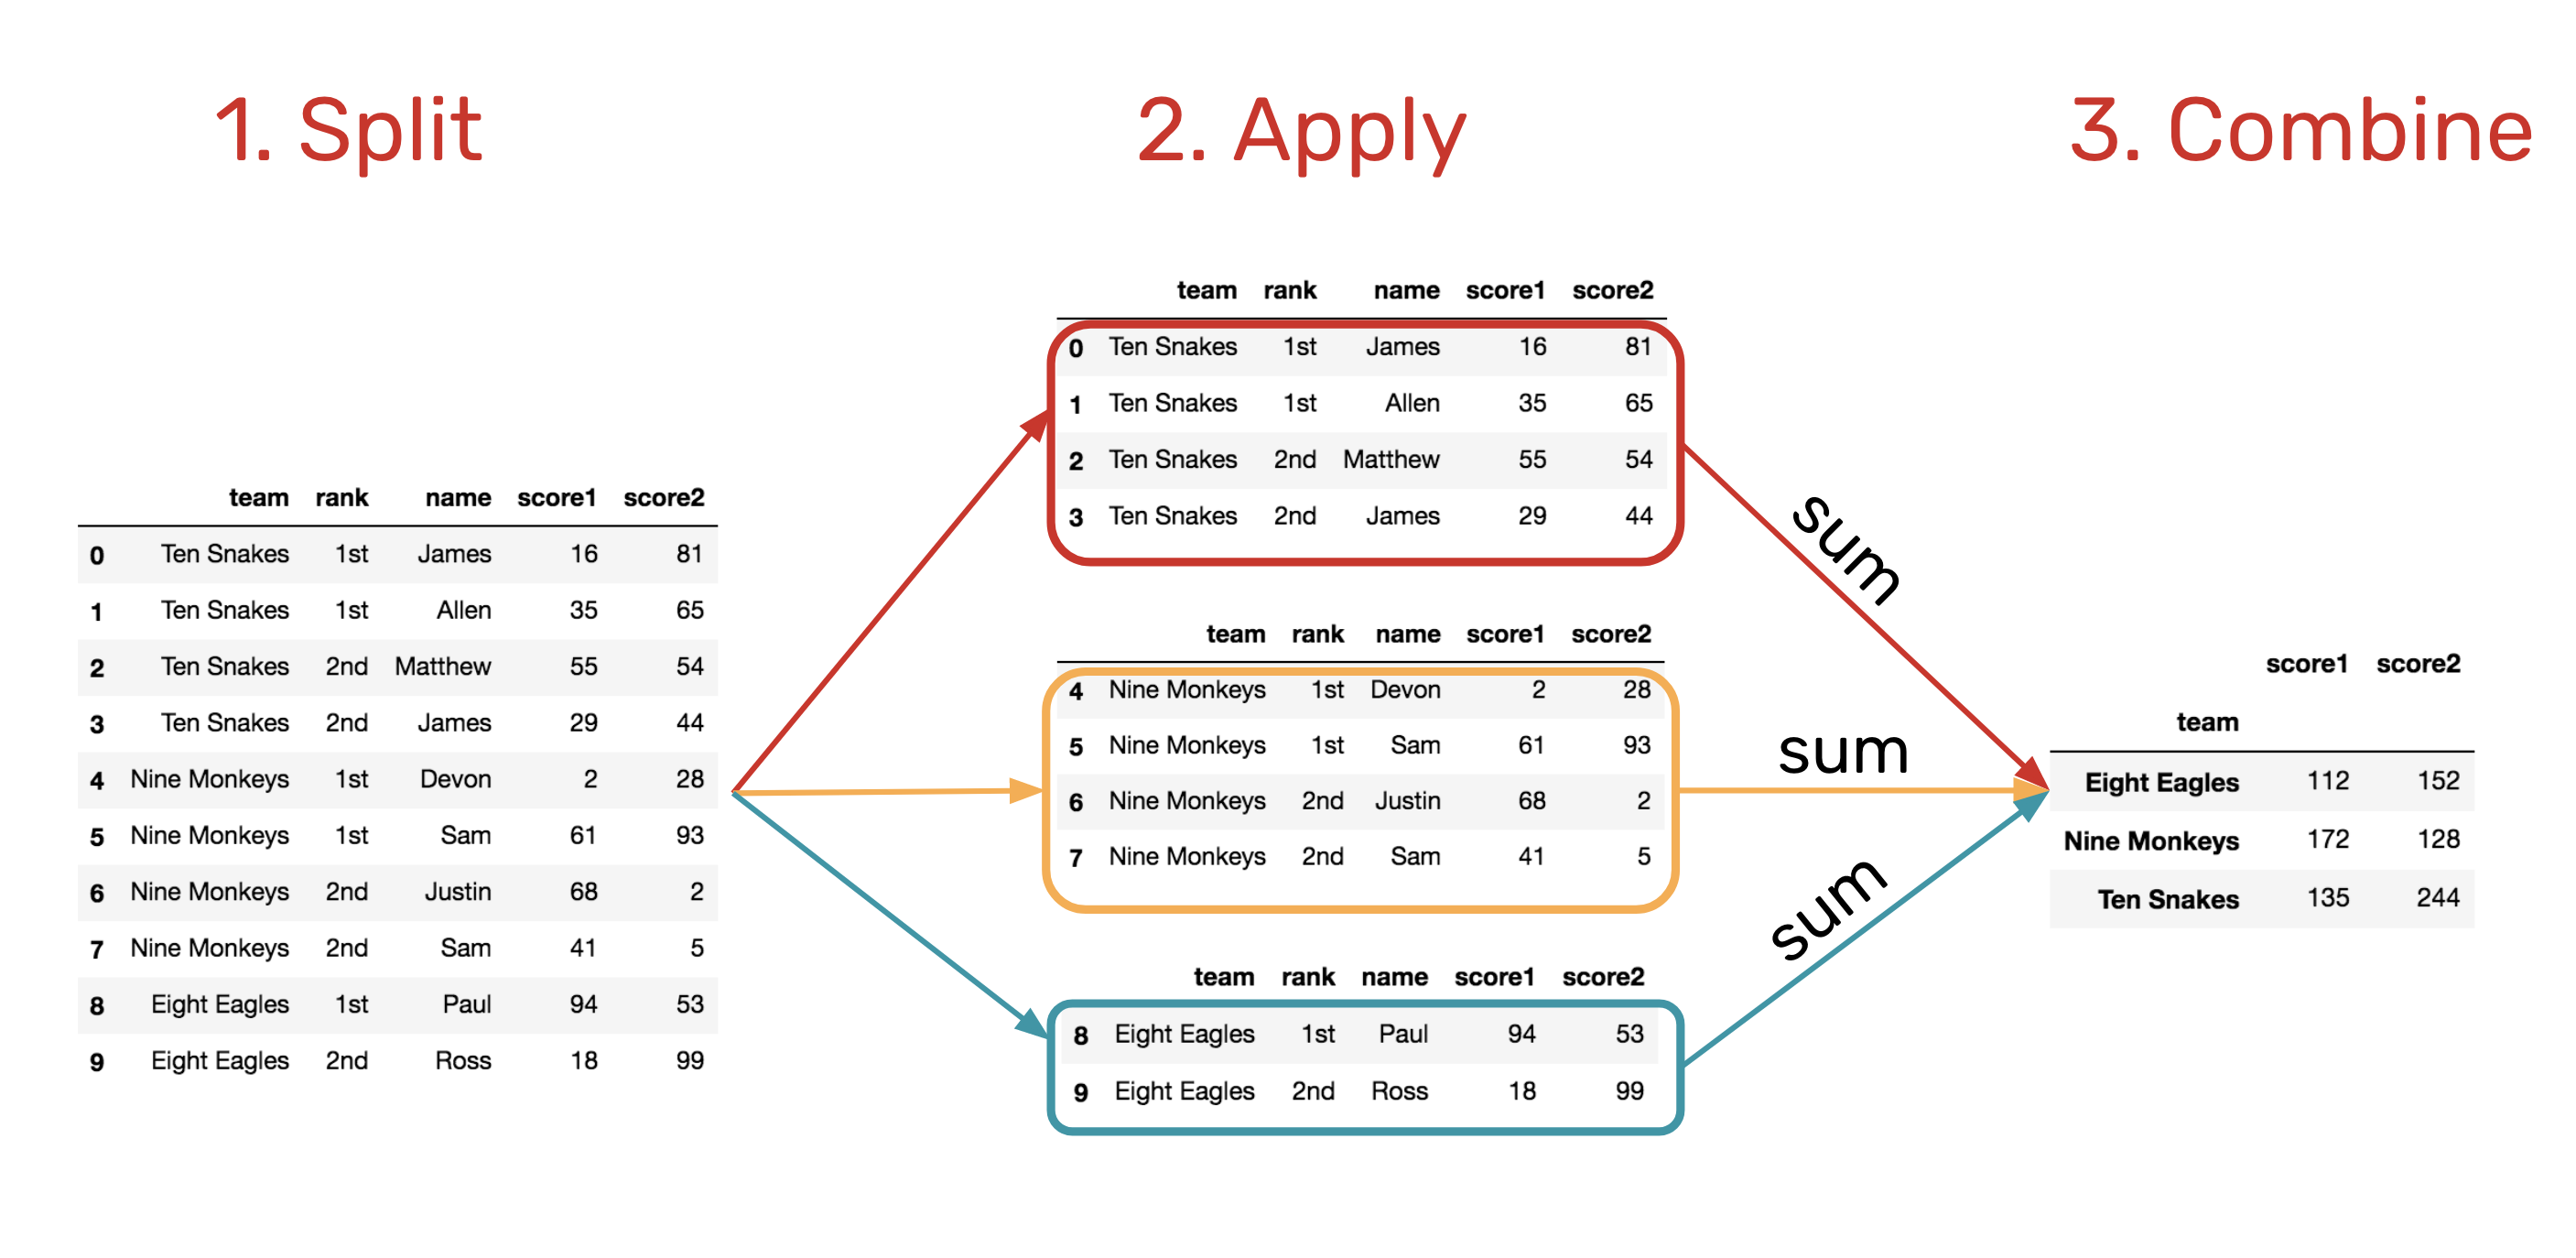

In [82]:

raw_data = {'team': ['Ten Snakes', 'Ten Snakes', 'Ten Snakes', 'Ten Snakes', 
                     'Nine Monkeys', 'Nine Monkeys', 'Nine Monkeys', 'Nine Monkeys', 
                     'Eight Eagles', 'Eight Eagles'], 
        'rank': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '2nd'], 
        'name': ['James', 'Allen', 'Matthew', 'James', 'Devon', 'Sam', 'Justin', 'Sam', 'Paul', 'Ross'], 
        'score1': [16,35,55,29,2,61,68,41,94,18],
        'score2': [81,65,54,44,28,93,2,5,53,99]}
df = pd.DataFrame(raw_data, columns = ['team', 'rank', 'name', 'score1', 'score2'])
df

,team,rank,name,score1,score2
0,Ten Snakes,1st,James,16,81
1,Ten Snakes,1st,Allen,35,65
2,Ten Snakes,2nd,Matthew,55,54
3,Ten Snakes,2nd,James,29,44
4,Nine Monkeys,1st,Devon,2,28
5,Nine Monkeys,1st,Sam,61,93
6,Nine Monkeys,2nd,Justin,68,2
7,Nine Monkeys,2nd,Sam,41,5
8,Eight Eagles,1st,Paul,94,53
9,Eight Eagles,2nd,Ross,18,99


Grouping by a single variable

In [103]:
grouped = df.groupby('team')
grouped

In [104]:
list(grouped)

[('Eight Eagles',
             team rank  name  score1  score2
  8  Eight Eagles  1st  Paul      94      53
  9  Eight Eagles  2nd  Ross      18      99),
 ('Nine Monkeys',
             team rank    name  score1  score2
  4  Nine Monkeys  1st   Devon       2      28
  5  Nine Monkeys  1st     Sam      61      93
  6  Nine Monkeys  2nd  Justin      68       2
  7  Nine Monkeys  2nd     Sam      41       5),
 ('Ten Snakes',
           team rank     name  score1  score2
  0  Ten Snakes  1st    James      16      81
  1  Ten Snakes  1st    Allen      35      65
  2  Ten Snakes  2nd  Matthew      55      54
  3  Ten Snakes  2nd    James      29      44)]

In [105]:
grouped.describe()

score1                                                   score2   
              count   mean        std   min    25%   50%    75%   max  count   
team                                                                           
Eight Eagles    2.0  56.00  53.740115  18.0  37.00  56.0  75.00  94.0    2.0  \
Nine Monkeys    4.0  43.00  29.631065   2.0  31.25  51.0  62.75  68.0    4.0   
Ten Snakes      4.0  33.75  16.235250  16.0  25.75  32.0  40.00  55.0    4.0   

                                                               
              mean        std   min    25%   50%    75%   max  
team                                                           
Eight Eagles  76.0  32.526912  53.0  64.50  76.0  87.50  99.0  
Nine Monkeys  32.0  42.292631   2.0   4.25  16.5  44.25  93.0  
Ten Snakes    61.0  15.853496  44.0  51.50  59.5  69.00  81.0

In [106]:
grouped.size()

team
Eight Eagles    2
Nine Monkeys    4
Ten Snakes      4
dtype: int64

In [107]:
grouped.count()

,rank,name,score1,score2
team,,,,
Eight Eagles,2,2,2,2
Nine Monkeys,4,4,4,4
Ten Snakes,4,4,4,4


In [108]:
grouped.get_group("Ten Snakes")

,team,rank,name,score1,score2
0,Ten Snakes,1st,James,16,81
1,Ten Snakes,1st,Allen,35,65
2,Ten Snakes,2nd,Matthew,55,54
3,Ten Snakes,2nd,James,29,44


Grouping by multiple index levels

In [109]:
df2 = df.set_index(['team','rank'])
df2

name  score1  score2
team         rank                         
Ten Snakes   1st     James      16      81
             1st     Allen      35      65
             2nd   Matthew      55      54
             2nd     James      29      44
Nine Monkeys 1st     Devon       2      28
             1st       Sam      61      93
             2nd    Justin      68       2
             2nd       Sam      41       5
Eight Eagles 1st      Paul      94      53
             2nd      Ross      18      99

In [110]:
grouped2 = df2.groupby(level=["team", "rank"])

In [111]:
grouped2.size()

team          rank
Eight Eagles  1st     1
              2nd     1
Nine Monkeys  1st     2
              2nd     2
Ten Snakes    1st     2
              2nd     2
dtype: int64

In [112]:
grouped2.get_group(("Eight Eagles", "1st"))

,,name,score1,score2
team,rank,,,
Eight Eagles,1st,Paul,94,53


Applying a function

In [115]:
grouped.agg(np.sum)

,rank,name,score1,score2
team,,,,
Eight Eagles,1st2nd,PaulRoss,112,152
Nine Monkeys,1st1st2nd2nd,DevonSamJustinSam,172,128
Ten Snakes,1st1st2nd2nd,JamesAllenMatthewJames,135,244


In [117]:
grouped2.agg(np.sum)

name  score1  score2
team         rank                              
Eight Eagles 1st           Paul      94      53
             2nd           Ross      18      99
Nine Monkeys 1st       DevonSam      63     121
             2nd      JustinSam     109       7
Ten Snakes   1st     JamesAllen      51     146
             2nd   MatthewJames      84      98

Filtering by groups

In [119]:
def f(x):
    m = x.mean(numeric_only=True)
    return (m.score1 > 50) & (m.score2 > 50)

In [120]:
grouped.filter(f)

,team,rank,name,score1,score2
8,Eight Eagles,1st,Paul,94,53
9,Eight Eagles,2nd,Ross,18,99


10. Exercise: grouping and filtering

In [134]:
df2

name  score1  score2
team         rank                         
Ten Snakes   1st     James      16      81
             1st     Allen      35      65
             2nd   Matthew      55      54
             2nd     James      29      44
Nine Monkeys 1st     Devon       2      28
             1st       Sam      61      93
             2nd    Justin      68       2
             2nd       Sam      41       5
Eight Eagles 1st      Paul      94      53
             2nd      Ross      18      99

In [130]:
grouped2 = df2.groupby(level=['team', 'rank'])


In [142]:
def f(x):

    return (x.score1.min()>50) and (x.score2.min()>50)

In [143]:
# Grouped by 'team' and 'rank'
grouped2.filter(f)

,,name,score1,score2
team,rank,,,
Eight Eagles,1st,Paul,94,53


In [144]:
# Grouped by 'team' only
grouped.filter(f)

,team,rank,name,score1,score2
